# **Selección de DataSet**

**Descripción del Dataset:** Este dataset con un tamaño de 10.000 filas y 14 columnas contiene información sobre clientes de una entidad financiera.

**Objetivo:** El problema de clasificación a resolver es predecir la variable "Exited" (1: el cliente se dió de baja, 0: el cliente permaneció). Esto permite a la empresa tomar decisiones basadas en el riesgo de pérdida de clientes.

**Variables:**

*   RowNumber: Índice de cada fila (irrelevante para el análisis).
*   CustomerId: Identificación única del cliente (también irrelevante para el análisis).
*   Surname: Apellido del cliente (irrelevante como predictor).
*   CreditScore: Puntaje de crédito del cliente (numérica).
*   Geography: País o región donde reside el cliente (categórica).
*   Gender: Género del cliente (categórica: "Male" o "Female").
*   Age: Edad del cliente (numérica).
*   Tenure: Tiempo de permanencia del cliente con la entidad, en años (numérica).
*   Balance: Saldo actual en la cuenta bancaria del cliente (numérica).
*   NumOfProducts: Número de productos contratados por el cliente (numérica).
*   HasCrCard: Indica si el cliente posee tarjeta de crédito (binaria: 1 o 0).
*   IsActiveMember: Indica si el cliente es un miembro activo (binaria: 1 o 0).
*   EstimatedSalary: Salario estimado del cliente (numérica).
*   Exited: Variable objetivo que indica si el cliente abandonó el servicio (binaria: 1 o 0).


#**0. Preparacion del Entorno**

**Descarga del dataset**

In [ ]:
import kagglehub

#Descargamos el dataset directamente desde Kaggle
path = kagglehub.dataset_download("mrtechnical011/classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 32.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrtechnical011/classification-dataset/versions/1


# **1. Analisis Exploratorio**

##**1.1. Mostramos en pantalla el dataframe (df)**

In [ ]:
import pandas as pd

df = pd.read_csv(f"{path}/Churn_Modelling.csv")
print(df.head().to_markdown())

|    |   RowNumber |   CustomerId | Surname   |   CreditScore | Geography   | Gender   |   Age |   Tenure |   Balance |   NumOfProducts |   HasCrCard |   IsActiveMember |   EstimatedSalary |   Exited |
|---:|------------:|-------------:|:----------|--------------:|:------------|:---------|------:|---------:|----------:|----------------:|------------:|-----------------:|------------------:|---------:|
|  0 |           1 |     15634602 | Hargrave  |           619 | France      | Female   |    42 |        2 |       0   |               1 |           1 |                1 |          101349   |        1 |
|  1 |           2 |     15647311 | Hill      |           608 | Spain       | Female   |    41 |        1 |   83807.9 |               1 |           0 |                1 |          112543   |        0 |
|  2 |           3 |     15619304 | Onio      |           502 | France      | Female   |    42 |        8 |  159661   |               3 |           1 |                0 |          113932   |  

Podemos ver que hay muchas variables categoricas como lo son la geografia, genero, Has Card, Is Active Member y apellido. Esta ultima no sera muy util para el análisis predictivo y mas adelante sera extraida del modelo

El resto de las variables son numericas y las exploraremos mas en detalle antes de decidir si las conservamos. Las variables claramente irrelevantes para el modelo son Row Number y Customer ID.

In [ ]:
df = df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'])

## **1.2. Valores nulos y Estadisticos descriptivos**

In [ ]:
print("Tamaño df:\n", df.shape)

print("Columnas del df:\n", df.columns)

Tamaño df:
 (10000, 11)
Columnas del df:
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


**Valores nulos**

In [ ]:
# Mostramos por pantalla el tipo de dato por variable y cantidad de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Podemos ver que no hay valores nulos en el dataset, por lo que procedemos al analisis de putliers

**Estadisticos descriptivos**

In [ ]:
# Mostramos en pantalla los estadisticos descriptivos de las variables numericas
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','HasCrCard','IsActiveMember']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.70550,0.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.45584,0.499797
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.00000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.00000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,1.00000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,1.00000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.00000,1.000000


Podemos hacer un analisis inicial sobre el conjunto con el que estamos trabajando:


*   *Credit Score*: La media tiene un score de 650, que es un score moderado, si se trata de un FICO Score. con una desviacion estandar de solo 96 puntos y un percentil 75 de 718. Por tanto, podemos concluir que la mayoria estan en una franja de score pobre a bueno.

*   *Age*: la edad promedio es de 39 y la desviacion estandar es de 10. Como era de esperar, la edad minima es de 18, pero llama la atencion que la mayor edad es de 92, mas de 4 desviaciones estandar del percentil 75%

* *Balance promedio:* La media es de 76k, pero la mediana es considerablemente mayor con 92k. Esto se debe a que en el valor minimo y percentil 25 hay balances en 0, algo que tendremos que ver con mayor detenimiento

* *Numero de productos*: La maxima cantidad es de 4 productos, pero la gran mayoria tiene entre 1 y 2, con por lo menos la mitad de los clientes teniendo solo 1 producto contratado.

* *Tarjeta*: La mayoria parece tener tarjeta asociada a su cuenta bancaria ya que, la media es de 0.7 (variable binaria).

* *Activo*: Basandonos en la media, la mitad de los clientes son activos y el resto no lo son.



In [ ]:
# Mostramos en pantalla los estadisticos descriptivos de las variables categoricas
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Aqui consideramos que no hay que ahondar mucho, pero hay tres regiones distintas y por lo menos la mitad de los usuarios son franceses.

En cuanto al género, la distribucion es cercana al 50-50.

## **1.3. Analisis de Outliers**

**Histograma**


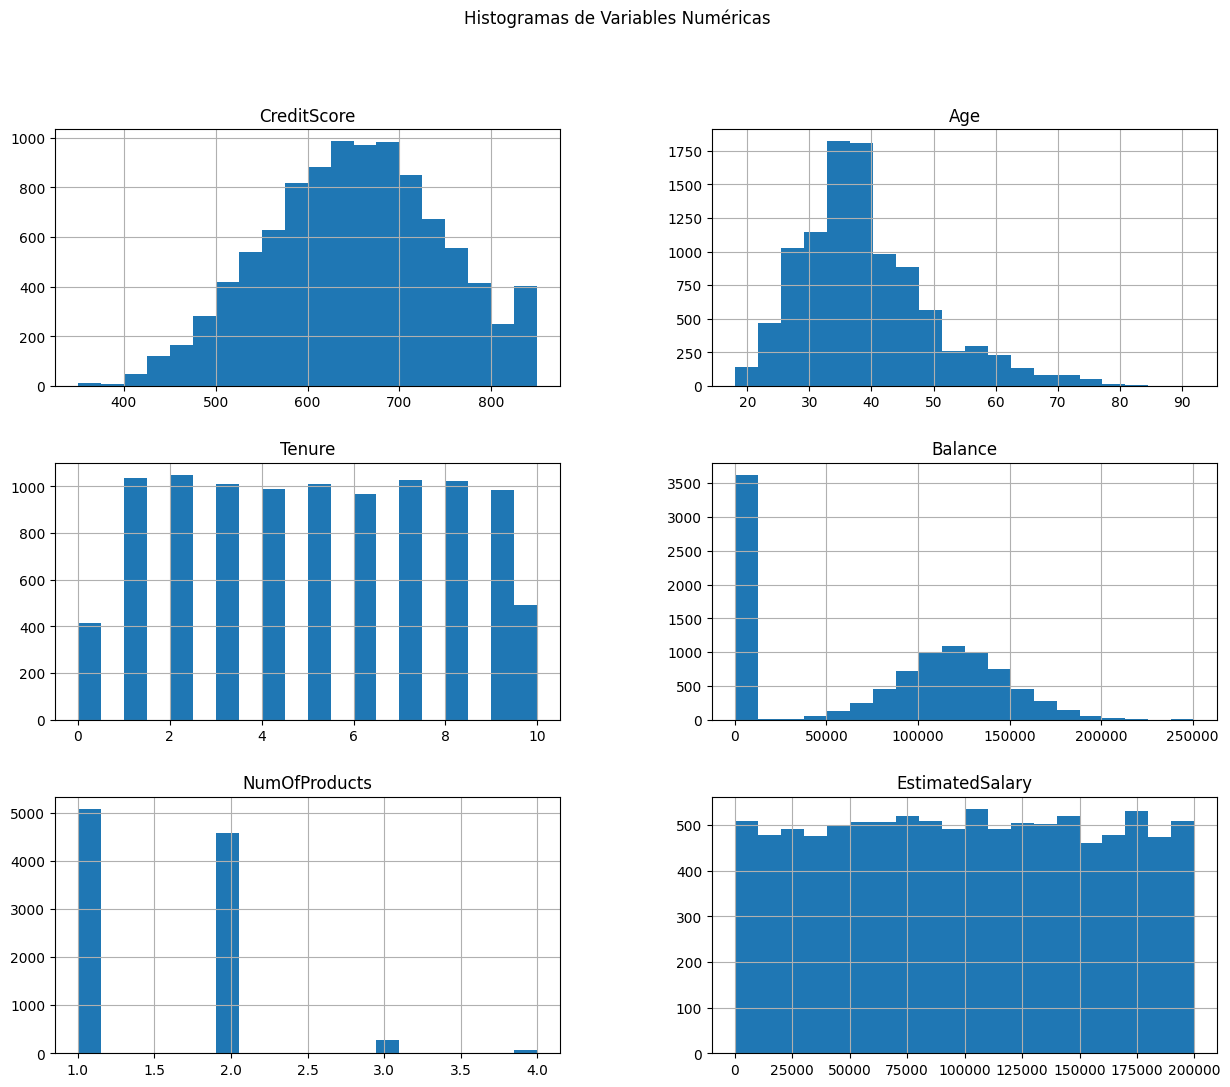

In [ ]:
#Importamos librerias
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas excluyendo las variables binarias
numerical_columns = [
    col for col in df.select_dtypes(include=['int64', 'float64'])
    if not (df[col].nunique() == 2 and sorted(df[col].unique()) == [0, 1])
]

# Graficamos histogramas de las variables
df[numerical_columns].hist(bins=20, figsize=(15, 12))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

* *CreditScore*: Mustra una distibucion similar a la normal, pero con una cola larga a la izquierda, lo que puede indicar presencia de outliers que bajan la media de score de la muestra

* *Age:* En este caso pasa lo contrario, entre 18 y 60 se sigue una distribucion normal, pero hay ua cola larga derecha que indica que hay outliers de mayores edades en la muestra. Es posible que limitemos la edad maxima como tratamiento, basandonos en la esperanza de vida como metrica

* *Tenure:* Esta variable es bastanet uniforme con cantidades similares de personas en los diferentes rangos de tiempo (años)

* *Balance:* Esta variable es muy particular debido a que hay una distribucion normal para balances positivos. Sin embargo, un tercio de la muestra tiene balance 0, algo que puede causar mucho ruido. Esta variable la exploraremos mas en detalle

* *Numero de productos:* La mayoria tienen entre 1-2 productos con muy pocos teniendo 3 o 4

* *Salario estimado:* Al igual que el tenure, es muy heterogeneo y con distribucion bastante uniforme. Esto crea sospechas sobre los balances cero, ya que en un primer momento podíamos intuir que pertenecían a clientes sin ingresos.

**Graficos de barras (variables binarias)**



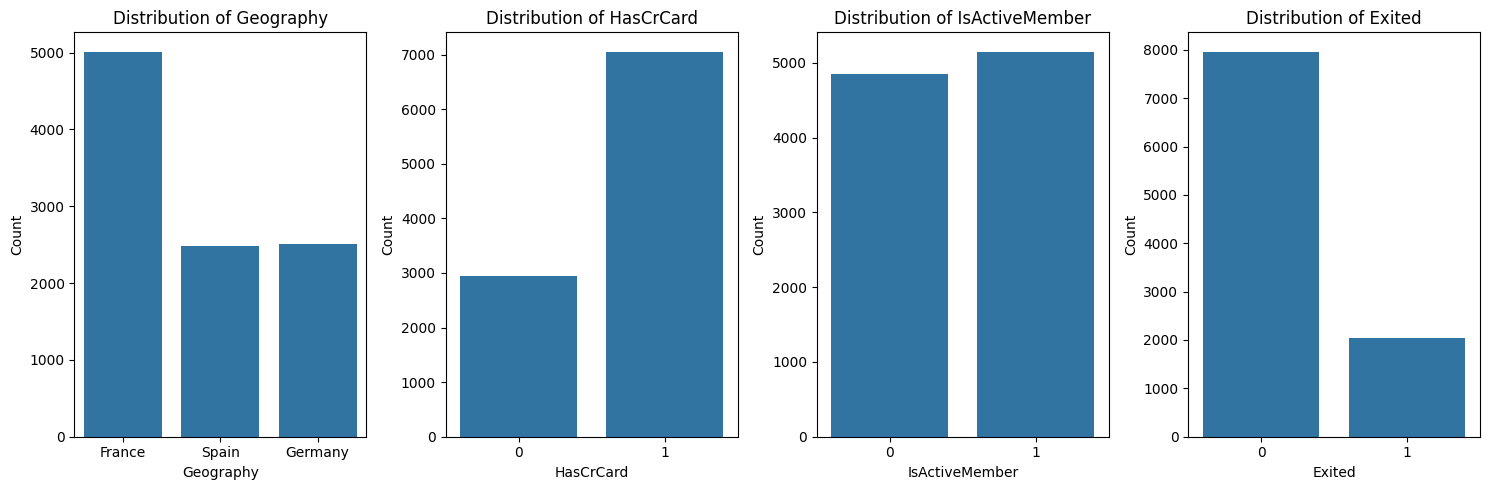

In [ ]:
# Definimos las columnas categoricas
categorical_columns = ['Geography', 'HasCrCard', 'IsActiveMember', 'Exited']

# Creamos un subplot con estas columnas
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))

# Creamos un loop con las columnas para asignarles ejes
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

Los graficos nos llevan a las mismas conclusiones a las que llegamos con los estaditicos desciptivos, pero es interesante ver que la cantidad de valores 'Exited' son solo 20% del total de la muestra. Esto puede presentar problemas a la hora de hacer las predicciones y es posible que tengamos que utilizar tecnicas como undersampling para tener una muestra mas balanceada

**Boxplot**

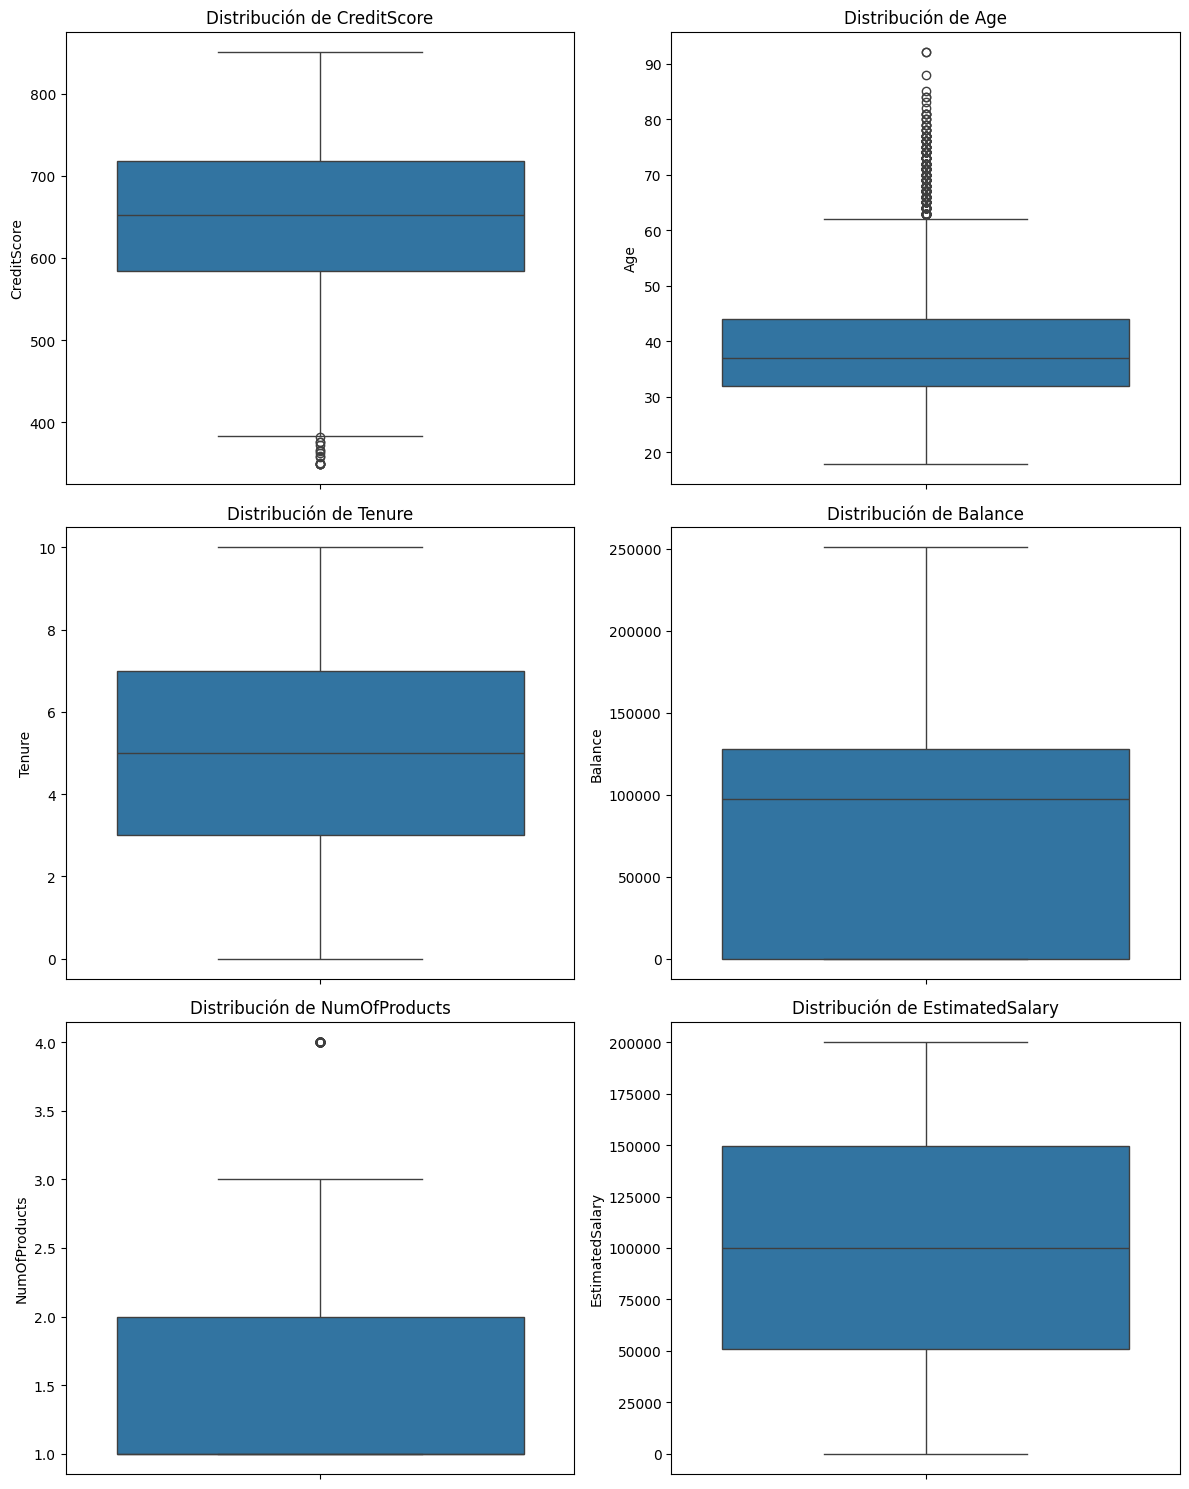

In [ ]:
# Seleccionamos las columnas numéricas
numerical_columns = [
    col for col in df.select_dtypes(include=['int64', 'float64'])
    if not (df[col].nunique() == 2 and sorted(df[col].unique()) == [0, 1])
]

# Calculamos el número de filas y columnas necesarias para los subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Redondeamos hacia arriba para más de 2 columnas

# Crear subplots dinámicamente
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))  # 2 columnas por fila
axes = axes.flatten()  # Aplanamos para iterar fácilmente

# Dibujamos cada boxplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')

# Ajustamos diseño y eliminamos ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.show()

Los histogramas muestran baja presencia de outliers importantes excepto en un par de variables como credit score (unos cuantos outliers bajos) y age (estos son clientes mayores a la gran mayoria)

## **1.4. Matriz de corelaciones**

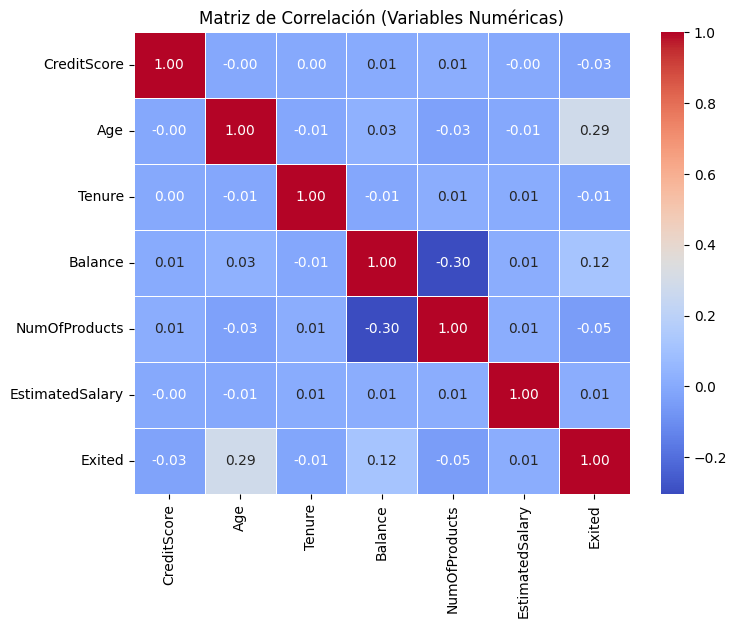

In [ ]:
# Seleccionamos las columnas numéricas para la matriz de correlación
num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
corr_matrix = df[num_columns].corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

Por lo general hay poca colinealidad entre las variables con dos expeciones clave:

* *Age:* Tiene correlacion moderada con exited, lo que nos dice que puede ser una variable muy indicativa

* *Balance:* Tiene alta correlacion con el numero de productos. Dado a que esta variable nos esta causando problemas, decidimos prescindir de ella.

  * Intentamos dividir los niveles de ingresos por deciles y asignar la media de los balances de cada decil para los clientes con balance cero.
  * Tambien se intento hacerlo por edad. En ambos casos se seguian viendo problemas debido a la homogeneidad de los datos.
  * Por tanto, debido a esta homogeneidad, creemos que si prescindimos de los balance a cero, los modelos que desarrollemos segurián siendo capaces de generalizar adecuadamente.

# **2. Transformamos las variables**


In [ ]:
#Tratamos outliers de age para mostrar únicamente mayores de 70 años sin especificar su edad
import numpy as np
df['Age'] = np.where(df['Age'] > 70, 70, df['Age'])

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop('Exited', axis=1)
y = df['Exited']

numeric_features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Transformamos las variables numéricas (imputación + escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Transformamos las variables categóricas nominales (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop= 'first'))
])

# Combinamos transformadores en ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Antes de seguir cualquier tipo de proceso, vamos a dividir en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Aplicamos la transformación al conjunto de entrenamiento
X_train_transformed = preprocessor.fit_transform(X_train)

# Obtenemos nombres de columnas después de la transformación
encoded_columns = (
    numeric_features +
    preprocessor.named_transformers_['cat']
        .named_steps['onehot']
        .get_feature_names_out(categorical_features).tolist()
)

In [ ]:
# Aplicamos la transformación al conjunto de prueba
X_test_transformed = preprocessor.transform(X_test)

# Obtenemos los nombres de las columnas transformadas
encoded_columns = (
    numeric_features +
    preprocessor.named_transformers_['cat']
        .named_steps['onehot']
        .get_feature_names_out(categorical_features)
        .tolist()
)

In [ ]:
# Importamos la librería RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# Aplicamos undersampling sobre el conjunto de entrenamiento
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_transformed, y_train)


#**3. Clustering**


Procedemos a implementar un metodo de clustering para ver si podemos separar los clientes en grupos con caracteristicas en comun

In [ ]:
df_cluster = df.copy()
df_cluster.head()

numeric_features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
categoric_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Transformamos las variables numéricas (imputación + escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop= 'first'))
])
# Combinamos transformadores en ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ])

scaled_features = preprocessor.fit_transform(df_cluster)

##**3.1. Método Elbow**

Con métoodo de Elbow buscaremos la cantidad de clusters óptimp para realizar K-Means

In [ ]:
# Importamos el módulo de KMeans
from sklearn.cluster import KMeans

# Clusters a probar
max_clusters = 10

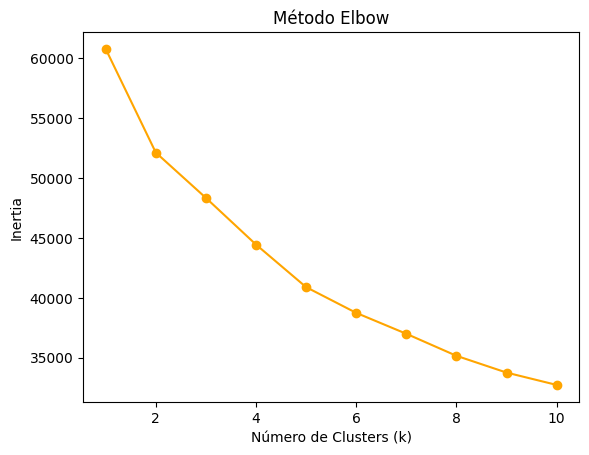

In [ ]:
#Calculamos el atributo inertia para el rango de 1 a 10 clusters
inertia_sklearn = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia_sklearn.append(kmeans.inertia_)

# Visualizamos la gráfica de Elbow
plt.plot(range(1, max_clusters + 1), inertia_sklearn, marker='o', color='orange')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Parece que la k óptima es 2 porque después la pendiente se vuelve significativamente menos pronunciada, de todas maneras, para asegurarnos realizaremos Silhouette

##**3.2. Silhouette**

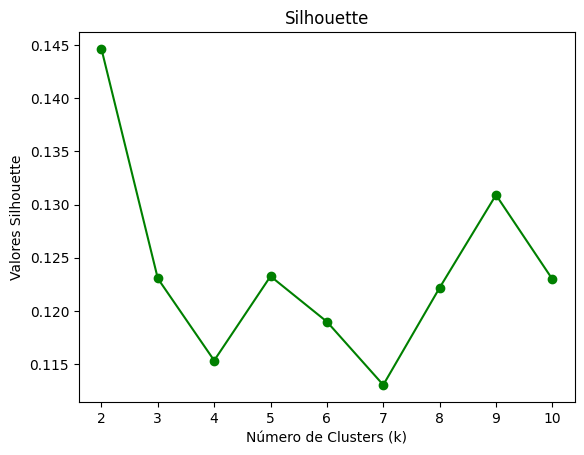

In [ ]:
#Importamos el coeficiente de Silhouette
from sklearn.metrics import silhouette_score


# Calculamos Silhouette para el rango de 2 a 10 clusters
silhouette_scores = []
k_values = range(2, max_clusters + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(scaled_features) # Obtenemos a qué cluster pertenece cada punto
    score = silhouette_score(scaled_features, cluster_labels) # Calculamos la cohesión y separación
    silhouette_scores.append(score)

# Visualizamos
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.xticks(k_values) # Nos aseguramos que cada valor de K se muestra en el eje x
plt.title('Silhouette')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Valores Silhouette')
plt.show()

Aqui tenemos un par de máximos locales, pero el máximo global es claramente 2 clusters. Así que, haremos KMeans con 2 clusters.

##**3.3. KMeans**


In [ ]:
# Aplicamos KMeans en el dataset estandarizado con 10 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

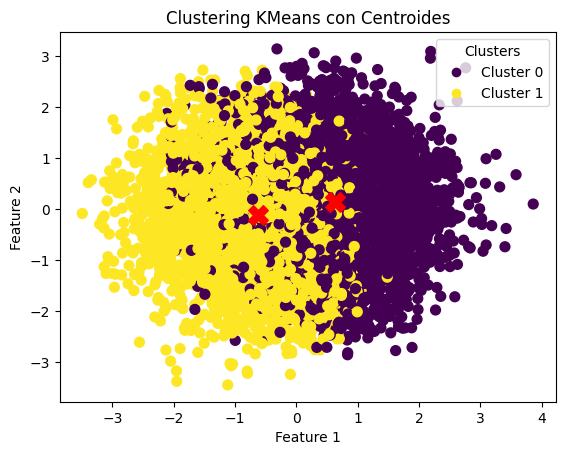

In [ ]:
# Importamos PCA y matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Realizamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Etiquetas para los clusters
cluster_labels = [f'Cluster {i}' for i in range(max(y_kmeans) + 1)]

# Visualizamos los clusters
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50)

# Calculamos los centroides en el espacio reducido
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Dibujamos los centroides
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='X', s=200, label='Centroides')

plt.title('Clustering KMeans con Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Agregamos la leyenda
handles, _ = scatter.legend_elements()
plt.legend(handles, cluster_labels, title="Clusters", loc="upper right")

# Mostramos el gráfico
plt.show()

In [ ]:
#Para ver las características de los clusters calculamos la media y moda de cada cluster para las variables numericas y categoricas respectivamente
df['Cluster'] = y_kmeans

agg_funcs = {
    'CreditScore': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'NumOfProducts': 'mean',
    'EstimatedSalary': 'mean',
    'Geography': lambda x: x.mode().iloc[0],
    'Gender': lambda x: x.mode().iloc[0],
    'HasCrCard': lambda x: x.mode().iloc[0],
    'IsActiveMember': lambda x: x.mode().iloc[0]
}

cluster = df.groupby('Cluster').agg(agg_funcs).round()

print(f"{cluster.to_markdown()}\n")

|   Cluster |   CreditScore |   Age |   Tenure |   NumOfProducts |   EstimatedSalary | Geography   | Gender   |   HasCrCard |   IsActiveMember |
|----------:|--------------:|------:|---------:|----------------:|------------------:|:------------|:---------|------------:|-----------------:|
|         0 |           652 |    38 |        5 |               2 |            100714 | France      | Male     |           1 |                1 |
|         1 |           649 |    40 |        5 |               1 |             99487 | France      | Male     |           1 |                1 |



##**3.4. Interpretación clusters**

Viendo los resultados vemos que la única diferencia entre es que el cluster 0 tiende a utilizar más productos (2 frente a 1). Pero no podemos suponer que se debe a los ingresos o otra variable porque tenemos resultados muy parecidos en ambos clusters.

No obstante, no nos preocupa no haber obtenido unos resultados significativos y diferenciadores entre clusters porque nos centraremos a continuacion en crear un modelo de clasificacion.

#**4. Modelo clasicación**



**Metodologia:**
Decidimos que testearemos multiples modelos de clasificacion para poder quedarnos con el mejor despues de evaluar las metricas de precision, accuracy y recall.

Nuestra variable objetivo es 'Exited'. Es decir, predecir de manera efectiva si un cliente si va a ir del banco o no

Haremos enfasis importante en la metrica de precision, ya que nos interesa tener buena capacidad de encontrar los verdaderos positivos ('Exited')

Utilizaremos el metodo de undersampling de RandomUnderSampler para ver si notamos diferencias en el performance del modelo. Dependiendo de si funciona o no, mostraremos en pantalla resultados con undersampling o los originales unicamente.

##**4.1. Regresión logística**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definimos y entrenamos el modelo de regresión logística
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_train_transformed, y_train)

# Predecimos la variable objetivo
y_pred = model_1.predict(X_test_transformed)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Mostramos las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.58      0.21      0.31       393

    accuracy                           0.82      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.82      0.78      2000



###**Regresión logística con undersampling**

In [ ]:
# Entrenamos el modelo
model_1.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable objetivo
y_pred = model_1.predict(X_test_transformed)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Mostramos las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1607
           1       0.51      0.47      0.49       393

    accuracy                           0.81      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.80      0.81      0.80      2000



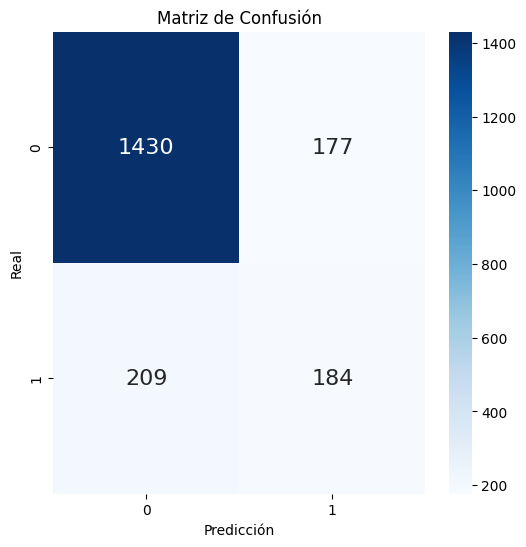

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Graficamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

##**4.2. DecisionTreeClassifier**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Definimos y entrenamos el modelo de regresión logística
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_transformed, y_train)

# Predecimos la variable objetivo
y_pred = model_2.predict(X_test_transformed)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Mostramos las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.47      0.45       393

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



###**DecisionTree con undersampling**

In [ ]:
# Entrenamos el modelo
model_2.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable objetivo
y_pred = model_2.predict(X_test_transformed)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Mostramos las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1607
           1       0.38      0.56      0.45       393

    accuracy                           0.74      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.74      0.75      2000



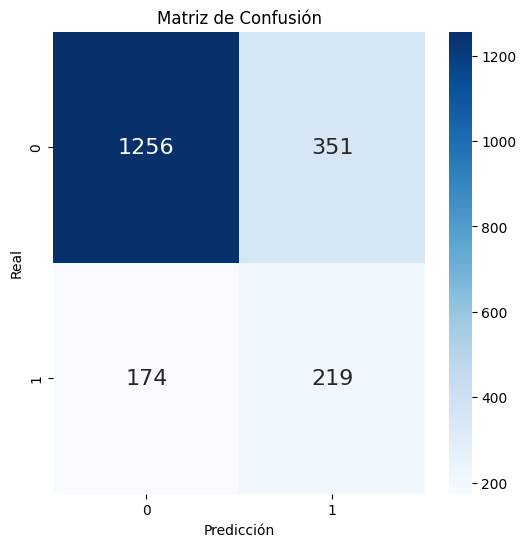

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

##**4.3. Random Forest - GridSearch**

In [ ]:
# Importamos las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definimos los valores posibles de los hiperparámetros que queremos probar en Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol (None significa sin límite)
    'min_samples_split': [2, 5, 10]  # Mínimo de muestras para dividir un nodo
}

# Creamos el modelo base de Random Forest
model_3 = RandomForestClassifier(random_state=42)

# Configuramos GridSearchCV para buscar los mejores hiperparámetros en función del accuracy con validación cruzada
grid_search = GridSearchCV(model_3, param_grid, cv=5, scoring='accuracy')

# Ajustamos GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_transformed, y_train)

# Obtenemos el mejor modelo encontrado
best_model_3 = grid_search.best_estimator_

# Hacemos predicciones con el mejor modelo en los datos de prueba
y_pred = best_model_3.predict(X_test_transformed)

# Mostramos los resultados del mejor modelo encontrado
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



###**RandomForest con undersampling**

In [ ]:
# Ajustamos GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtenemos el mejor modelo encontrado
best_model_3 = grid_search.best_estimator_

# Hacemos predicciones con el mejor modelo en los datos de prueba
y_pred = best_model_3.predict(X_test_transformed)

# Mostramos los resultados del mejor modelo encontrado
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.57      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



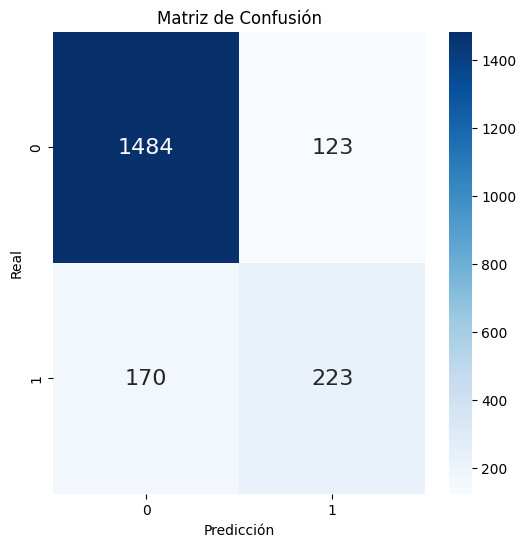

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# **5. Conclusiones generales**

**DATASET**

*   Creemos que habian ciertos datos que podian tener errores o que se pudieron haber tratado de manera distinta. La variable Balance en particular presentó muchos problemas incluso a la hora de simular los valores en 0. Creemos igualmente que no era una variable relevante para el modelo.

* Algunos features no eran muy explicativos debido a su altra prevalencia a tener ciertos valores especificos como lo era la cantidad de productos (casi todos entre uno o dos). Tampoco era de gran ayuda el bajo nivel de churn que habia en la muestra ya que el modelo puede generar tendencia a decir que el banco no perderá el cliente.


**CLUSTERING**

*   Llegamos a la conclusion que los centroides estaban muy cerca de cada uno y que no era facil discernir la mayoria de los dos clusters, lo que indica gran similitud entre los usuarios

*   Hicimos un analisis mas profundo para analizar las caracteristicas que tenian en comun. Sin embargo, como pudimos observar no necesariamente siempre se llegan a conlusiones significativas.


**UNDERSAMPLING**


*   Decidimos experimentar con undersampling para balancear la muestra y tener mas valores con Exited = 1.
*   Los resultados fueron mejoras en recall en todos los modelos, pero en todos los casos la precision de Exited bajo varios puntos porcentuales. Dado que el recall es la métrica a priorizar porque es la que nos permite detectar mejor los clientes que realmente se van, decidimos quedarnos con el modelo de Random Forest con undersampling.


**MODELO DE CLASIFICACION**


*   El modelo con el que nos quedamos al final fue un Random Forest con mejoras a traves de grid search para encontrar los mejores hiperparámetros.
*   En termino de metricas, el accuracy del modelo con undersampling (85) era muy parecido al modelo sin undersampling (86), por lo tanto, la mejora en recall de la clase 1 no afecta negativamente a la capacidad general del modelo.



